In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [51]:
csv = pd.read_csv('2015 Stack Overflow Developer Survey Responses.csv')

df_0 = pd.DataFrame(csv,columns=['Years IT / Programming Experience','Tabs or Spaces','Compensation: midpoint'])
df_0.columns = [c.replace(':', '') for c in df_0.columns]
df_0.columns = [c.replace('/', '') for c in df_0.columns]
df_0.columns = [c.replace(' ', '_') for c in df_0.columns]

df_0 = df_0.dropna() 
#df_0.head()

In [52]:
df_sal_1 = df_0.copy()
df_sal_1 = df_sal_1[~df_sal_1['Compensation_midpoint'].isin(['Rather not say','Unemployed'])]

df_sal_1.loc[:,'Years'] = 0

df_sal_1.loc[df_sal_1['Years_IT__Programming_Experience'] == 'Less than 1 year', 'Years'] = 0.5
df_sal_1.loc[df_sal_1['Years_IT__Programming_Experience'] == '1 - 2 years', 'Years'] = 1.5
df_sal_1.loc[df_sal_1['Years_IT__Programming_Experience'] == '2 - 5 years', 'Years'] = 3.5
df_sal_1.loc[df_sal_1['Years_IT__Programming_Experience'] == '6 - 10 years', 'Years'] = 8
df_sal_1.loc[df_sal_1['Years_IT__Programming_Experience'] == '11+ years', 'Years'] = 15

df_sal_1.loc[:,'Compensation_midpoint'] = pd.to_numeric(df_sal_1['Compensation_midpoint'])
df_sal_1.loc[:,'Years']                 = pd.to_numeric(df_sal_1['Years'])

df_sal_1.head()

,Years_IT__Programming_Experience,Tabs_or_Spaces,Compensation_midpoint,Years
0,2 - 5 years,Tabs,30000,3.5
1,1 - 2 years,Spaces,30000,1.5
2,1 - 2 years,Tabs,90000,1.5
4,2 - 5 years,Tabs,70000,3.5
6,1 - 2 years,Tabs,10000,1.5


In [55]:
df_tab = df_sal_1.query('Tabs_or_Spaces == "Tabs"').copy()
df_sp  = df_sal_1.query('Tabs_or_Spaces == "Spaces" ').copy()

#print df_tab.shape, df_sp.shape

(6362, 4) (5448, 4)


In [54]:
df_t = df_tab.copy()
df_t = df_tab.groupby('Years').mean()
df_t.columns = ['Mean']

df_s = df_sp.copy()
df_s = df_sp.groupby('Years').mean()
df_s.columns = ['Mean']

print df_t.index.values, df_t.Mean.values

[  0.5   1.5   3.5   8.   15. ] [ 23546.09929078  26686.67466987  35539.60166744  51779.97527812
  79428.57142857]


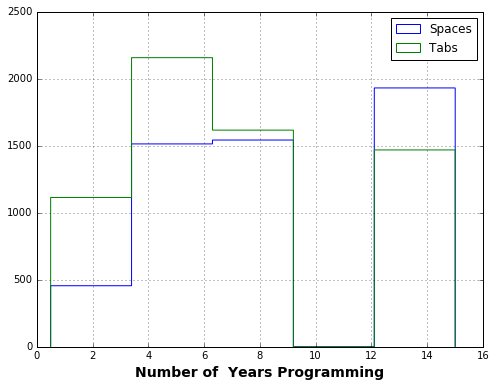

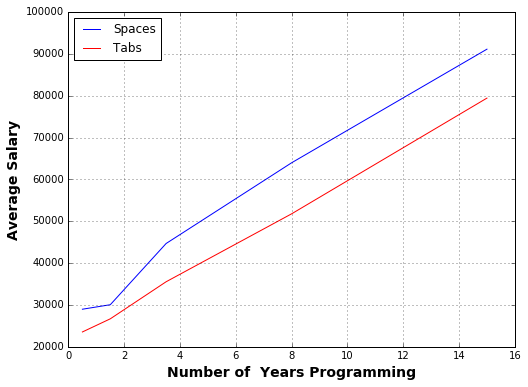

In [11]:
plt.figure(figsize=(8,6))
plt.hist(df_sp.Years.values,bins=5,histtype='step',label='Spaces')
plt.hist(df_tab.Years.values,bins=5,histtype='step',label='Tabs')
plt.xlabel('Number of  Years Programming',fontsize=14,weight='bold')
#plt.ylabel('Average Salary',fontsize=14,weight='bold')
plt.legend(loc=0)
plt.grid(True)


plt.figure(figsize=(8,6))
plt.plot(df_s.index.values,df_s.Mean.values,'b-',label='Spaces')
plt.plot(df_t.index.values,df_t.Mean.values,'r-',label='Tabs')
plt.xlabel('Number of  Years Programming',fontsize=14,weight='bold')
plt.ylabel('Average Salary',fontsize=14,weight='bold')
plt.legend(loc=0) #loc='upper left',bbox_to_anchor=(0.1,0.7))
plt.grid(True)


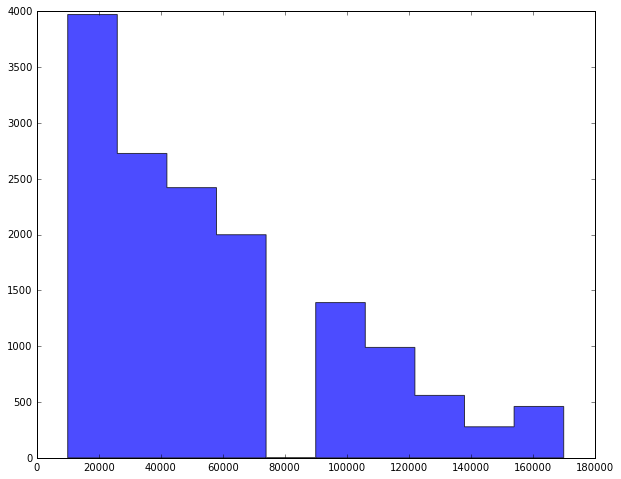

In [18]:
df_1 = df_sal_1.dropna(how='any')
sal = df_1['Compensation_midpoint'].dropna(how='any')

plt.figure(figsize=(10,8))
_,_,_ =plt.hist(sal.values,bins=10,histtype='stepfilled',alpha=0.7)
#plt.grid(True)

In [21]:
csv = pd.read_csv('2015 Stack Overflow Developer Survey Responses.csv')

fields = ['Most annoying about job search: Finding time','Most annoying about job search: Finding job I\'m qualified for','Most annoying about job search: Finding interesting job',\
          'Most annoying about job search: Interesting companies rarely respond','Most annoying about job search: Writing and updating CV',\
          'Most annoying about job search: Taking time off work to interview','Most annoying about job search: The Interview']

#print csv

In [107]:

df_1 = pd.DataFrame(csv) #,columns=['Gender', 'Years IT / Programming Experience','Current Lang & Tech: ',\
                         #        'Tabs or Spaces','Compensation: midpoint'])
df_1.columns = [c.replace(':', '') for c in df_1.columns]
df_1.columns = [c.replace('/', '') for c in df_1.columns]
df_1.columns = [c.replace(' ', '_') for c in df_1.columns]

In [108]:
def makePlots(question,label_v,absolute=True):

    t_v = []; s_v = []

    for i in xrange(len(label_v)):
        df_2 = df_1[['Tabs_or_Spaces','%s_%s'%(question,label_v[i])]]
        df_2 = df_2.dropna() 
        t_v.append(df_2.query('Tabs_or_Spaces == "Tabs"').shape[0])
        s_v.append(df_2.query('Tabs_or_Spaces == "Spaces"').shape[0])
        
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    if absolute:
        plt.plot(s_v,'bo',label='Spaces')
        plt.plot(t_v,'k+',label='Tabs')
        plt.title('Absolute Rates of Response to \n \'Most urgent info about job opportunity\' ',fontsize=16,weight='bold')
    else:
        rel_s_v = [ float(s_v[i]) / np.cumsum(s_v)[-1] for i in xrange(len(s_v))]
        rel_t_v = [ float(t_v[i]) / np.cumsum(t_v)[-1] for i in xrange(len(t_v))]
        plt.plot(rel_s_v,'bo',label='Spaces')
        plt.plot(rel_t_v,'k+',label='Tabs')
        plt.title('Relative Rates of Response to \n \'Most urgent info about job opportunity\' ',fontsize=16,weight='bold')
    
    plt.legend(loc=0)
    plt.grid(True)
    plt.xticks(rotation=90)
    ax.set_xticks([i for i in xrange(0,len(label_v))])
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticklabels(label_v,fontsize=16) #,weight='bold')
    plt.xlim(-0.5, len(label_v))

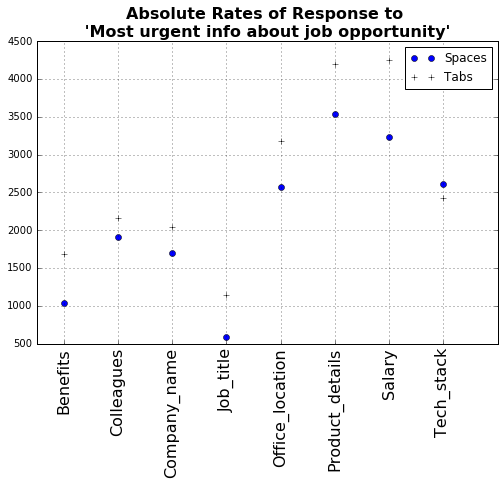

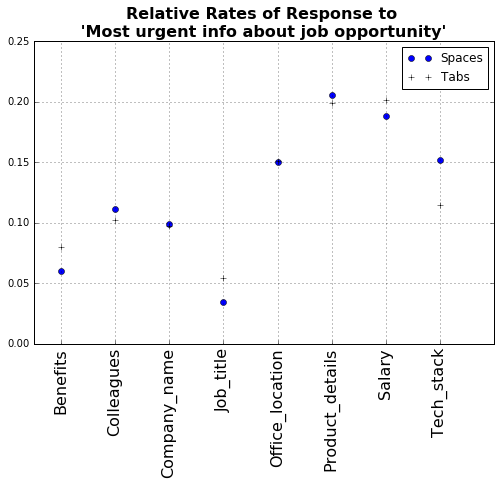

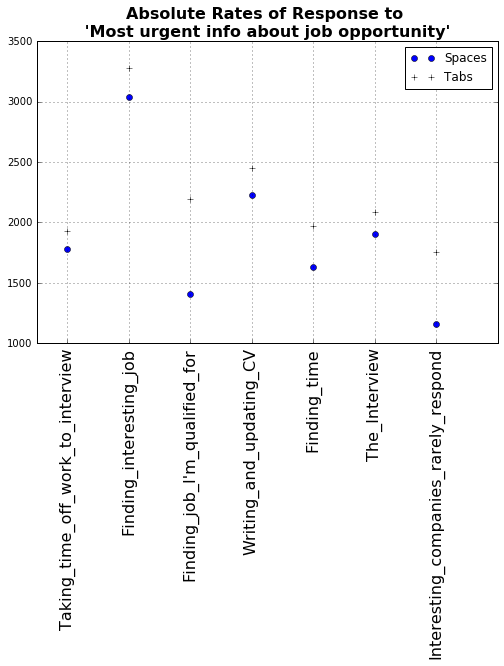

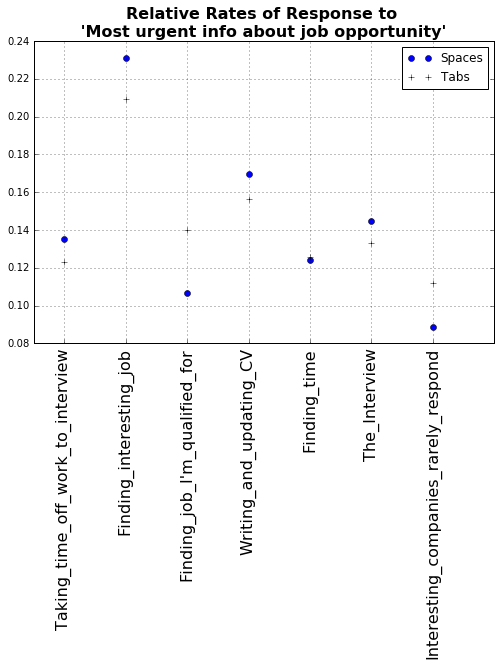

In [109]:
label_v = ['Benefits','Colleagues','Company_name','Job_title','Office_location','Product_details','Salary','Tech_stack']
question = 'Most_urgent_info_about_job_opportunity'
makePlots(question,label_v,absolute=True)
makePlots(question,label_v,absolute=False)

label_v = ['Taking_time_off_work_to_interview','Finding_interesting_job','Finding_job_I\'m_qualified_for','Writing_and_updating_CV','Finding_time','The_Interview','Interesting_companies_rarely_respond']
question = 'Most_annoying_about_job_search'
makePlots(question,label_v,absolute=True)
makePlots(question,label_v,absolute=False)


In [111]:
df_1['Current_Lang_&_Tech_Write-In']



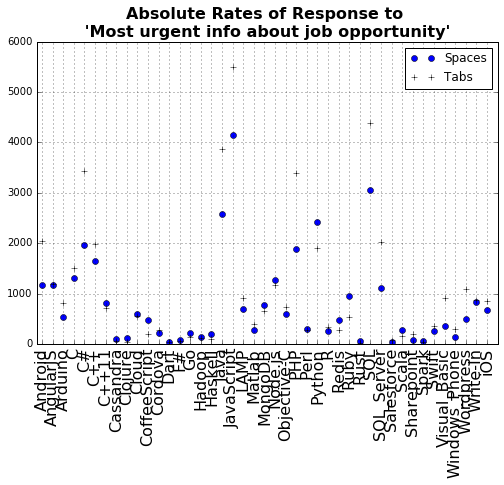

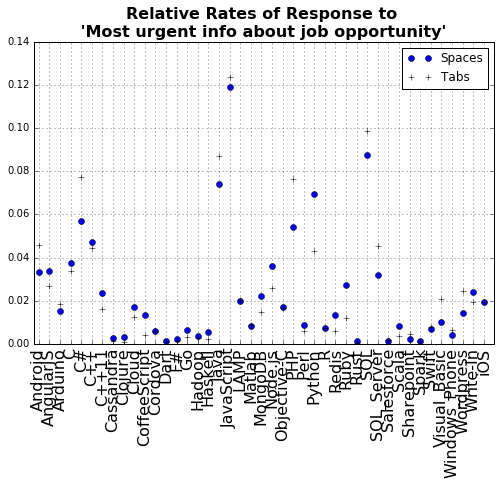

In [115]:
label_v = ['Android','AngularJS','Arduino','C','C#','C++','C++11','Cassandra','Clojure','Cloud','CoffeeScript','Cordova',\
'Dart','F#','Go','Hadoop','Haskell','Java','JavaScript','LAMP','Matlab','MongoDB','Node.js','Objective-C','PHP',\
'Perl','Python','R','Redis','Ruby','Rust','SQL','SQL_Server','Salesforce','Scala','Sharepoint','Spark','Swift',\
'Visual_Basic','Windows_Phone','Wordpress','Write-In','iOS']
question = 'Current_Lang_&_Tech'
makePlots(question,label_v,absolute=True)
makePlots(question,label_v,absolute=False)
